In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from pmdarima.arima import auto_arima

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('D:\karan data\Data for Preprocessing\Forecasting Data\co2_mm_mlo.csv')

In [9]:
df['Date'] = pd.to_datetime({'Year': df['year'], 'Month' : df['month'], 'Day' : 1})

In [10]:
df.set_index('Date', inplace = True)

In [11]:
df.index.freq = 'MS'

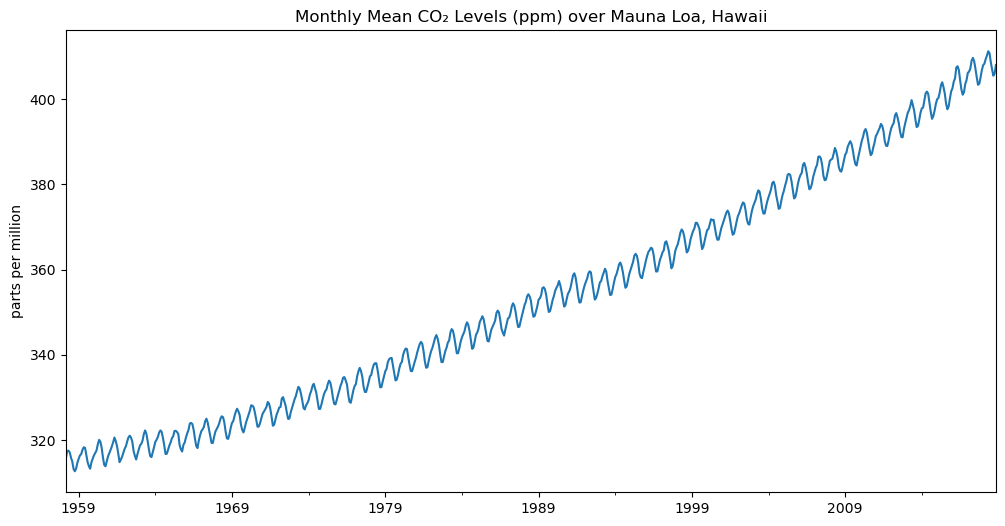

In [12]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here

ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

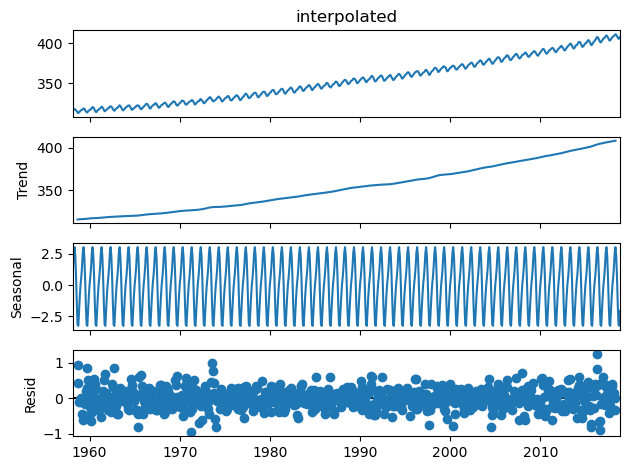

In [13]:
result = seasonal_decompose(df['interpolated'], model = 'add')
result.plot();

In [14]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.251
Date:                            Sat, 02 Mar 2024   AIC                            424.503
Time:                                    12:16:29   BIC                            452.044
Sample:                                03-01-1958   HQIC                           435.130
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3519      0.067      5.284      0.000       0.221       0.482
ar.L2          0.0878      0.034      2.567      0.010       0.021       0.155
ma.L1         -0.7071      0.058    -12.229      0.000      -0.820      -0.594
ar.S.L12       0.9996      0.000   3065.761      0.000       0.999       1.000
ma.S.L12      -0.8670      0.021    -40.782      0.000      -0.909      -0.825
sigma2         0.0957      0.005     20.397      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Set one year for testing
train = df.iloc[:717]
test = df.iloc[717:]

In [16]:
model = SARIMAX(train['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.888
Date:                            Sat, 02 Mar 2024   AIC                            415.775
Time:                                    12:19:20   BIC                            443.217
Sample:                                03-01-1958   HQIC                           426.372
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3493      0.085      4.101      0.000       0.182       0.516
ar.L2          0.0838      0.040      2.071      0.038       0.004       0.163
ma.L1         -0.7036      0.077     -9.126      0.000      -0.855      -0.553
ar.S.L12       0.9996      0.000   2841.657      0.000       0.999       1.000
ma.S.L12      -0.8649      0.023    -37.756      0.000      -0.910      -0.820
sigma2         0.0954      0.005     20.687      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.64
Prob(Q):                              0.80   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

In [18]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['interpolated'][i]}")

predicted=406.5995318, expected=406.81
predicted=407.8160771, expected=407.96
predicted=408.5707462, expected=408.32
predicted=409.4804124, expected=409.41
predicted=411.0413621, expected=410.24
predicted=411.6459148, expected=411.24
predicted=410.865633 , expected=410.79
predicted=409.1751316, expected=408.71
predicted=407.0751456, expected=406.99
predicted=405.6254011, expected=405.51
predicted=405.8968323, expected=406.0
predicted=407.4312076, expected=408.02


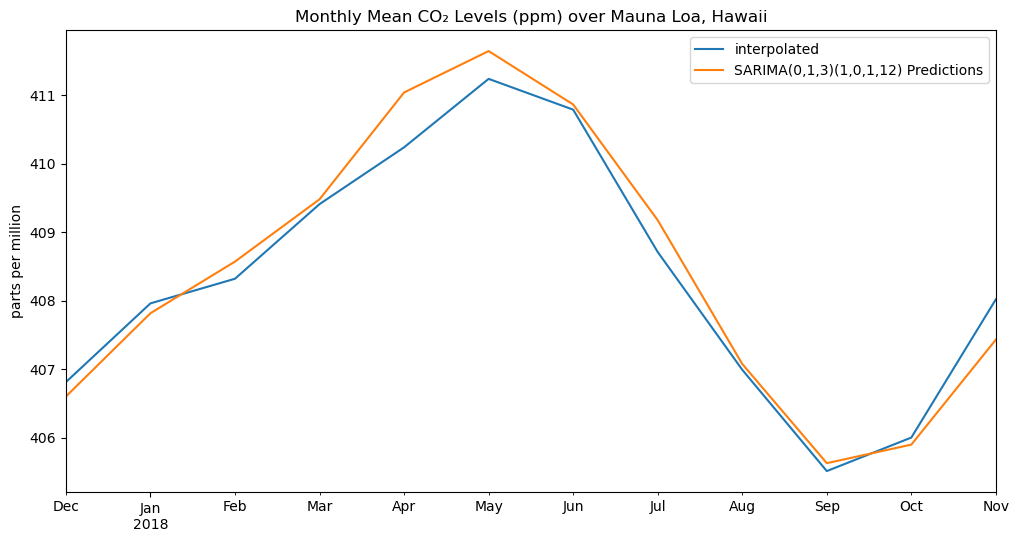

In [19]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [21]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['interpolated'], predictions)
print(f'SARIMA(2,1,2)(1,0,1,12) MSE Error: {error:11.10}')

SARIMA(2,1,2)(1,0,1,12) MSE Error: 0.1283121118


In [22]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['interpolated'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error: 0.3582068003


In [23]:
model = SARIMAX(df['interpolated'],order=(0,1,3),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

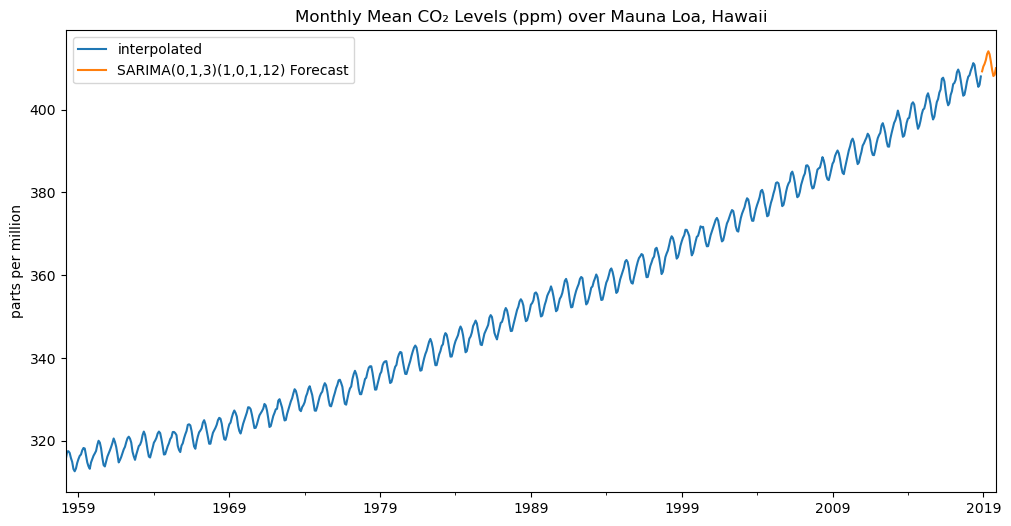

In [24]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = df['interpolated'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);